**Alfrethanov Christian Wijaya**

**24060120140147**

# **Data Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

%matplotlib inline
from pandas import Series, DataFrame
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pylab import rcParams
rcParams['figure.figsize'] = 9, 8  # set plot size

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/PrakDatMin/Iris.csv')

Mounted at /content/drive


Memasukkan library-library yang diperlukan untuk pengerjaan Clustering pada dataset Iris.csv dan juga mengimport / memasukkan dataset Iris.csv yang disimpan dalam Google Drive dalam folder PrakDatMin dengan menggunakan fitur pd.read_csv()

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Sedikit tampilan mengenai dataset Iris.csv dengan hanya menampilkan 5 baris 6 kolom

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Tampilan di atas merupakan deskripsi statistik dataset Iris.csv dengan menggunakan fitur describe()

In [ ]:
df.shape

(150, 6)

Dataset Iris.csv memiliki 150 Baris dan 6 Kolom

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Tidak terdapat *Missing Value* pada dataset Iris.csv sehingga tidak diperlukan adanya prosedur apapun untuk mengatasi masalah *Missing Value* pada dataset

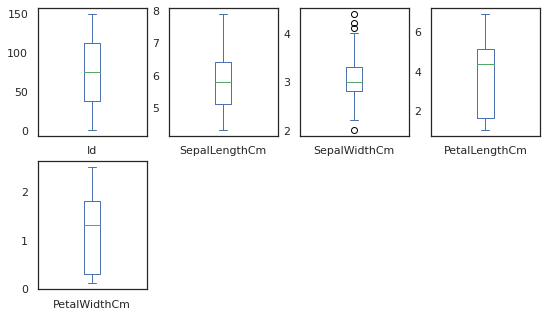

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False)
plt.show()

Ditemukan bahwa terdapat beberapa data *Outliers* pada dataset Iris.csv pada kolom / fitur SepalWidthCm

In [ ]:
def find_outliers_IQR(data):
  q1=data.quantile(0.25)
  q3=data.quantile(0.75)
  
  IQR=q3-q1
  
  outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
  
  return outliers

Membuat fungsi untuk mendeteksi adanya *Outliers* pada dataset serta menemukan di mana lokasi tepatnya (pada baris / index ke-berapa) data *Outliers* tersebut

In [ ]:
outliers = find_outliers_IQR(df["SepalWidthCm"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 4
max outlier value: 4.4
min outlier value: 2.0


15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64

Dengan bantuan fungsi find_outliers_IQR yang tadi telah kita buat, kita dapat menemukan nilai maksimal dan minimal data *Outlier* dari fitur / kolom SepalWidthCm, yaitu 4.4 untuk nilai maksimal dan 2.0 untuk nilai minimal serta ditemukan berapa banyaknya data *Outliers* yang ada pada kolom SepalWidthCm, yaitu 4 data *Outliers*. Kemudian, terdeteksi bahwa 4 data *Outliers* tersebut berada pada baris / index ke-15, 32, 33, dan 60 dari dataset, maka nanti pada tahap Data Preparation and Cleaning harus dilakukan suatu prosedur untuk memperbaiki data *Outliers* ini

# **Data Preparation** and **Cleaning** and **Feature Selection**

In [ ]:
iris_SP = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_SP.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Code di atas merupakan tahap Feature Selection untuk dataset Iris.csv yang di mana kita harus menyeleksi fitur-fitur apa saja yang dibutuhkan dan tidak dibutuhkan dalam melakukan prosedur Clustering nantinya, serta membuang fitur yang tidak dibutuhkan tersebut dan hanya menggunakan fitur yang dibutuhkan untuk melakukan prosedur Clustering nanti. Oleh karena itu, kita membuat dataset baru dengan nama iris_SP dengan hanya mengambil fitu SepalLengthCm, SepalWidthCm, PetalLengthCm, dan PetalWidthCm karena hanya fitur tersebut yang dibutuhkan yang di mana 2 fitur lainnya, yaitu Id dan Species tidak dibutuhkan karena fitur Species bernilai categorical dan tidak berhubungan dengan proses clustering serta Id yang hanya berfungsi untuk memberi kode Id untuk masing-masing data sehingga tidak diperlukan untuk proses Clustering.

In [ ]:
iris_SP.drop([15,32,33,60], axis=0, inplace=True)

iris_SP

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Code di atas merupakan proses penghapusan Baris / Index yang mengandung data outliers, khususnya pada fitur SepalWidthCm yang terdapat pada Baris 15, 32, 33, 60 (4 data Outliers). Kita dapat melakukan proses penghapusan karena hanya 4 baris yang dihapus, yaitu hanya sedikit baris data yang dihapus di mana kita memiliki 150 baris data total dan hanya menghapus 4 baris data sehingga tidak terlalu memengaruhi hasilnya nanti.

# **Modeling** and **Visualizing**

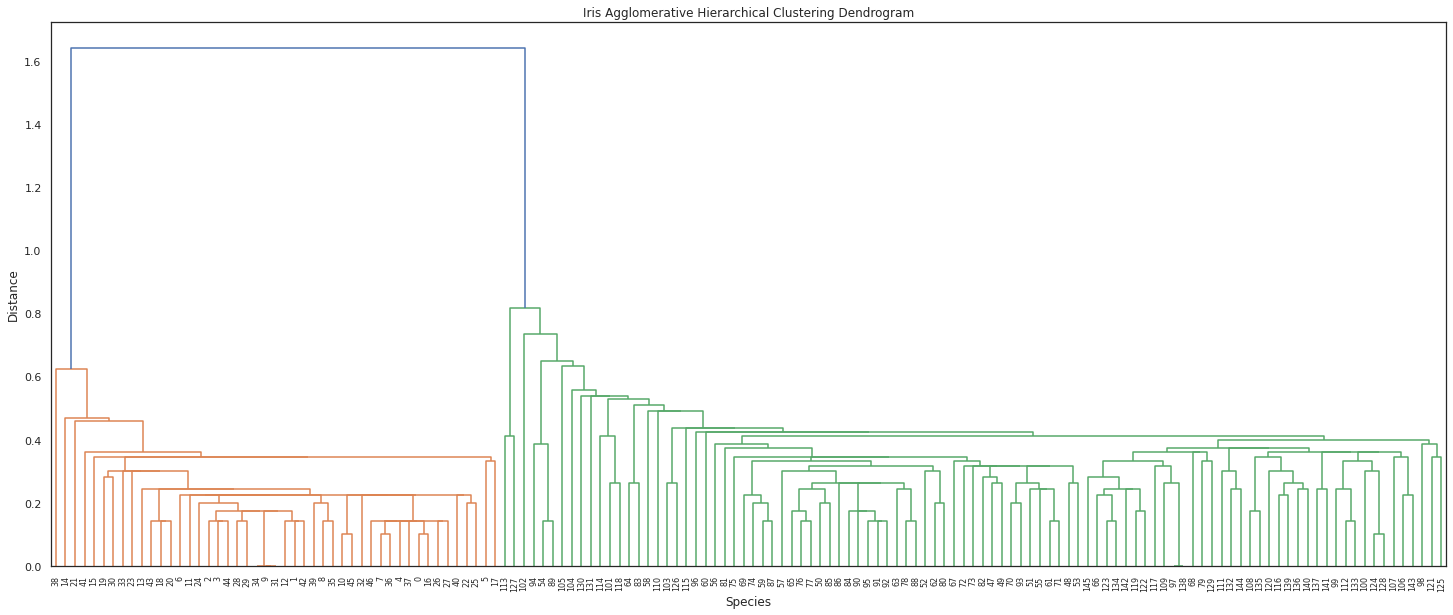

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(iris_SP, 'single')

max_d = 7.08

plt.figure(figsize=(25, 10))
plt.title('Iris Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    linked,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
    )

plt.axhline(y=max_d, c='k')
plt.show()

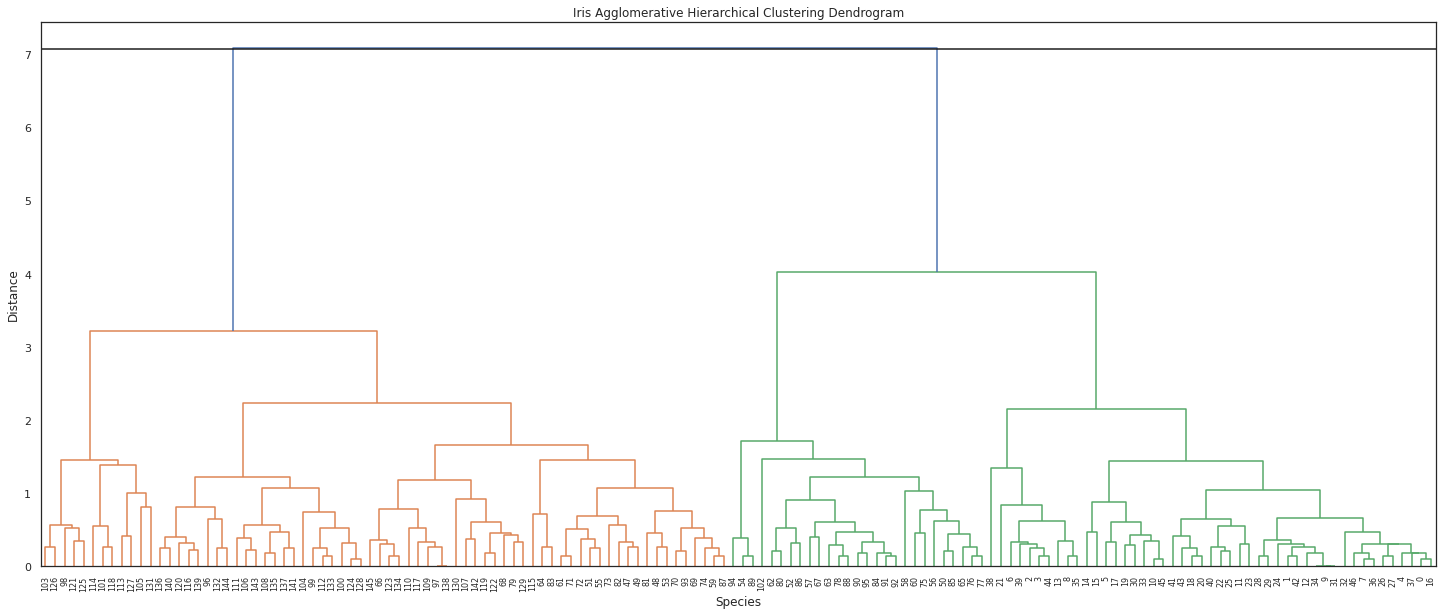

In [ ]:
linked = linkage(iris_SP, 'complete')

max_d = 7.08

plt.figure(figsize=(25, 10))
plt.title('Iris Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    linked,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
    )

plt.axhline(y=max_d, c='k')
plt.show()

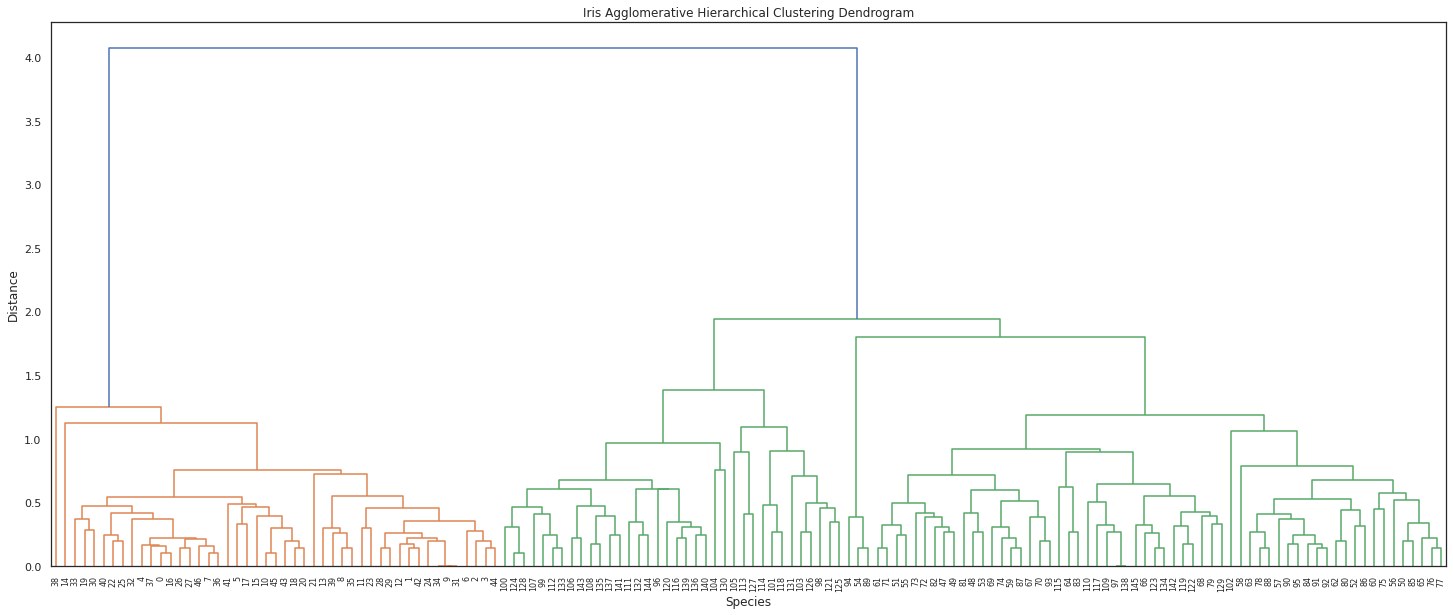

In [ ]:
linked = linkage(iris_SP, 'average')

max_d = 7.08

plt.figure(figsize=(25, 10))
plt.title('Iris Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    linked,
    truncate_mode='lastp',
    p=150,
    leaf_rotation=90.,
    leaf_font_size=8.,
    )

plt.axhline(y=max_d, c='k')
plt.show()

Pada tahap Modeling and Visualizing ini, kita dapat melihat bentuk visualisasi Dendrogram dengan metode linkage single, complete, dan average dengan bantuan fitur-fitur yang ada pada library Scientific Python (Scipy) seperti fitur dendrogram() dan fitur-fitur lainnya yang ada pada library Matplotlib. Metode linkage single merupakan prosedur yang didasarkan pada jarak terkecil yang di mana jika dua objek terpisah oleh jarak yang pendek maka kedua objek tersebut akan digabung menjadi satu cluster dan demikian saterusnya. Kemudian, metode linkage complete merupakan metode linkage yang berlawanan dengan Single Linkage yang di mana prosedur ini pengelompokkannya berdasarkan jarak terjauh. Terakhir, metode linkage average merupakan prosedur yang hampir sama dengan Single Linkage maupun Complete Linkage, namun kriteria yang digunakan adalah rata-rata jarak seluruh individu dalam suatu cluster dengan jarak seluruh individu dalam cluster yang lain.